In [11]:
import pandas as pd
from pathlib import Path
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

In [12]:
main_vcf_files = Path("./result_r1.3_10k_ccre/main-vcf-summaries/").glob("*_bias.json")
main_vcf_entries = []
for main_vcf_file in main_vcf_files:
    with main_vcf_file.open("r") as f:
        afbin = main_vcf_file.name.split("_")[0]
        main_vcf_json = json.load(f)
        main_vcf_df = pd.DataFrame(main_vcf_json)
        main_vcf_df["afbin"] = afbin
        main_vcf_df["ratio_count"] = main_vcf_df.apply(lambda x: x["intron"] / x["intergenic"] , axis=1)
        main_vcf_df["ratio_basepair"] = main_vcf_df.apply(lambda x: x["intron_bases"] / x["intergenic_bases"] , axis=1)
        main_vcf_entries.append(main_vcf_df)

main_vcf_df = pd.concat(main_vcf_entries, ignore_index=True)

main_vcf_df.head(10)

,intron,intergenic,intron_bases,intergenic_bases,afbin,ratio_count,ratio_basepair
0,22870,20980,6239702,9684627,common,1.090086,0.644289
1,32919,30217,70600277,121986707,ultrarare,1.089420,0.578754
2,17841,15945,11265697,19436896,rare,1.118909,0.579604


In [13]:
iter_files = Path("./result_r1.3_10k_ccre/iter-bias/").glob("*.bias.json")
iter_dfs = []
for iter_file in iter_files:
    with iter_file.open("r") as f:
        afbin = iter_file.name.split("_")[0]
        iter_json = json.load(f)
        iter_df = pd.DataFrame(iter_json)
        iter_df["afbin"] = afbin
        iter_df["ratio_count"] = iter_df.apply(lambda x: x["intron"] / x["intergenic"] , axis=1)
        iter_df["ratio_basepair"] = iter_df.apply(lambda x: x["intron_bases"] / x["intergenic_bases"] , axis=1)
        iter_dfs.append(iter_df)

iter_df = pd.concat(iter_dfs, ignore_index=True)

iter_df.head(10)

,intron,intergenic,intron_bases,intergenic_bases,afbin,ratio_count,ratio_basepair
0,39357,31903,81709542,122905062,ultrarare,1.233646,0.664818
1,24042,21046,7399645,8033058,common,1.142355,0.921149
2,19387,16668,14518743,19197104,rare,1.163127,0.756299
3,24076,21011,7335754,8386177,common,1.145876,0.874744
4,23840,21248,7628365,7974326,common,1.121988,0.956616
5,23797,21289,7193080,8441119,common,1.117807,0.852148
6,19408,16647,14952882,20166431,rare,1.165856,0.741474
7,39260,31993,81623657,121931185,ultrarare,1.227143,0.669424
8,23828,21257,7149345,7782049,common,1.120948,0.918697
9,19378,16678,14309366,17548732,rare,1.161890,0.815407


In [14]:
iter_df_countRatio_mean = iter_df.groupby(["afbin"]).mean()
iter_df_countRatio_std = iter_df.groupby(["afbin"]).std()
iter_df_countRatio_percentile_0 = iter_df.groupby(["afbin"]).min()
iter_df_countRatio_percentile_5 = iter_df.groupby(["afbin"]).quantile( q=0.05 )
iter_df_countRatio_percentile_25 = iter_df.groupby(["afbin"]).quantile( q=0.25 )
iter_df_countRatio_percentile_50 = iter_df.groupby(["afbin"]).quantile( q=0.5 )
iter_df_countRatio_percentile_75 = iter_df.groupby(["afbin"]).quantile( q=0.75 )
iter_df_countRatio_percentile_95 = iter_df.groupby(["afbin"]).quantile( q=0.95 )
iter_df_countRatio_percentile_100 = iter_df.groupby(["afbin"]).max()

In [15]:
## Get Mean
iter_df_SUMMARY = iter_df_countRatio_mean.drop(['intron', 'intergenic','intron_bases','intergenic_bases'], axis=1)
iter_df_SUMMARY = iter_df_SUMMARY.rename({'ratio_count': 'ratio_count_1mean', 'ratio_basepair': 'ratio_basepair_1mean'}, axis=1)
feature="2std"
## Get Standard dev
iter_df_TMP = iter_df_countRatio_std.drop(['intron', 'intergenic','intron_bases','intergenic_bases'], axis=1)
iter_df_TMP = iter_df_TMP.rename({'ratio_count': 'ratio_count_'+feature, 'ratio_basepair': 'ratio_basepair_'+feature}, axis=1)
iter_df_TMP
## Combine
iter_df_SUMMARY = iter_df_SUMMARY.merge(iter_df_TMP, how='inner' , left_on='afbin', right_on='afbin')
iter_df_SUMMARY

,ratio_count_1mean,ratio_basepair_1mean,ratio_count_2std,ratio_basepair_2std
afbin,,,,
common,1.130809,0.905347,0.010691,0.074533
rare,1.164719,0.782471,0.012163,0.054693
ultrarare,1.235486,0.656237,0.009830,0.017879


In [16]:
## Get Min
iter_df_PERCENTILE = iter_df_countRatio_percentile_0.drop(['intron', 'intergenic','intron_bases','intergenic_bases'], axis=1)
iter_df_PERCENTILE = iter_df_PERCENTILE.rename({'ratio_count': 'ratio_count_1_MIN', 'ratio_basepair': 'ratio_basepair_1_MIN'}, axis=1)

## Get percentile
feature='2_5%-tile'
iter_df_TMP = iter_df_countRatio_percentile_5.drop(['intron', 'intergenic','intron_bases','intergenic_bases'], axis=1)
iter_df_TMP = iter_df_TMP.rename({'ratio_count': 'ratio_count_'+feature, 'ratio_basepair': 'ratio_basepair_'+feature}, axis=1)
iter_df_TMP
## Combine
iter_df_PERCENTILE = iter_df_PERCENTILE.merge(iter_df_TMP, how='inner' , left_on='afbin', right_on='afbin')

## Get percentile
feature='3_25%-tile'
iter_df_TMP = iter_df_countRatio_percentile_25.drop(['intron', 'intergenic','intron_bases','intergenic_bases'], axis=1)
iter_df_TMP = iter_df_TMP.rename({'ratio_count': 'ratio_count_'+feature, 'ratio_basepair': 'ratio_basepair_'+feature}, axis=1)
iter_df_TMP
## Combine
iter_df_PERCENTILE = iter_df_PERCENTILE.merge(iter_df_TMP, how='inner' , left_on='afbin', right_on='afbin')

## Get percentile
feature='4_50%-tile'
iter_df_TMP = iter_df_countRatio_percentile_50.drop(['intron', 'intergenic','intron_bases','intergenic_bases'], axis=1)
iter_df_TMP = iter_df_TMP.rename({'ratio_count': 'ratio_count_'+feature, 'ratio_basepair': 'ratio_basepair_'+feature}, axis=1)
iter_df_TMP
## Combine
iter_df_PERCENTILE = iter_df_PERCENTILE.merge(iter_df_TMP, how='inner' , left_on='afbin', right_on='afbin')

## Get percentile
feature='5_75%-tile'
iter_df_TMP = iter_df_countRatio_percentile_75.drop(['intron', 'intergenic','intron_bases','intergenic_bases'], axis=1)
iter_df_TMP = iter_df_TMP.rename({'ratio_count': 'ratio_count_'+feature, 'ratio_basepair': 'ratio_basepair_'+feature}, axis=1)
iter_df_TMP
## Combine
iter_df_PERCENTILE = iter_df_PERCENTILE.merge(iter_df_TMP, how='inner' , left_on='afbin', right_on='afbin')

## Get percentile
feature='6_95%-tile'
iter_df_TMP = iter_df_countRatio_percentile_95.drop(['intron', 'intergenic','intron_bases','intergenic_bases'], axis=1)
iter_df_TMP = iter_df_TMP.rename({'ratio_count': 'ratio_count_'+feature, 'ratio_basepair': 'ratio_basepair_'+feature}, axis=1)
iter_df_TMP
## Combine
iter_df_PERCENTILE = iter_df_PERCENTILE.merge(iter_df_TMP, how='inner' , left_on='afbin', right_on='afbin')

## Get percentile
feature='7_MAX'
iter_df_TMP = iter_df_countRatio_percentile_95.drop(['intron', 'intergenic','intron_bases','intergenic_bases'], axis=1)
iter_df_TMP = iter_df_TMP.rename({'ratio_count': 'ratio_count_'+feature, 'ratio_basepair': 'ratio_basepair_'+feature}, axis=1)
iter_df_TMP
## Combine
iter_df_PERCENTILE = iter_df_PERCENTILE.merge(iter_df_TMP, how='inner' , left_on='afbin', right_on='afbin')
iter_df_PERCENTILE

,ratio_count_1_MIN,ratio_basepair_1_MIN,ratio_count_2_5%-tile,ratio_basepair_2_5%-tile,ratio_count_3_25%-tile,ratio_basepair_3_25%-tile,ratio_count_4_50%-tile,ratio_basepair_4_50%-tile,ratio_count_5_75%-tile,ratio_basepair_5_75%-tile,ratio_count_6_95%-tile,ratio_basepair_6_95%-tile,ratio_count_7_MAX,ratio_basepair_7_MAX
afbin,,,,,,,,,,,,,,
common,1.089152,0.635895,1.113538,0.777622,1.123640,0.855966,1.130618,0.908123,1.137839,0.957217,1.148749,1.023025,1.148749,1.023025
rare,1.119137,0.542177,1.144979,0.684668,1.156400,0.748566,1.164755,0.785650,1.172904,0.819318,1.184815,0.867376,1.184815,0.867376
ultrarare,1.199741,0.597385,1.219291,0.627469,1.228884,0.644053,1.235491,0.655992,1.242204,0.668194,1.251644,0.686490,1.251644,0.686490


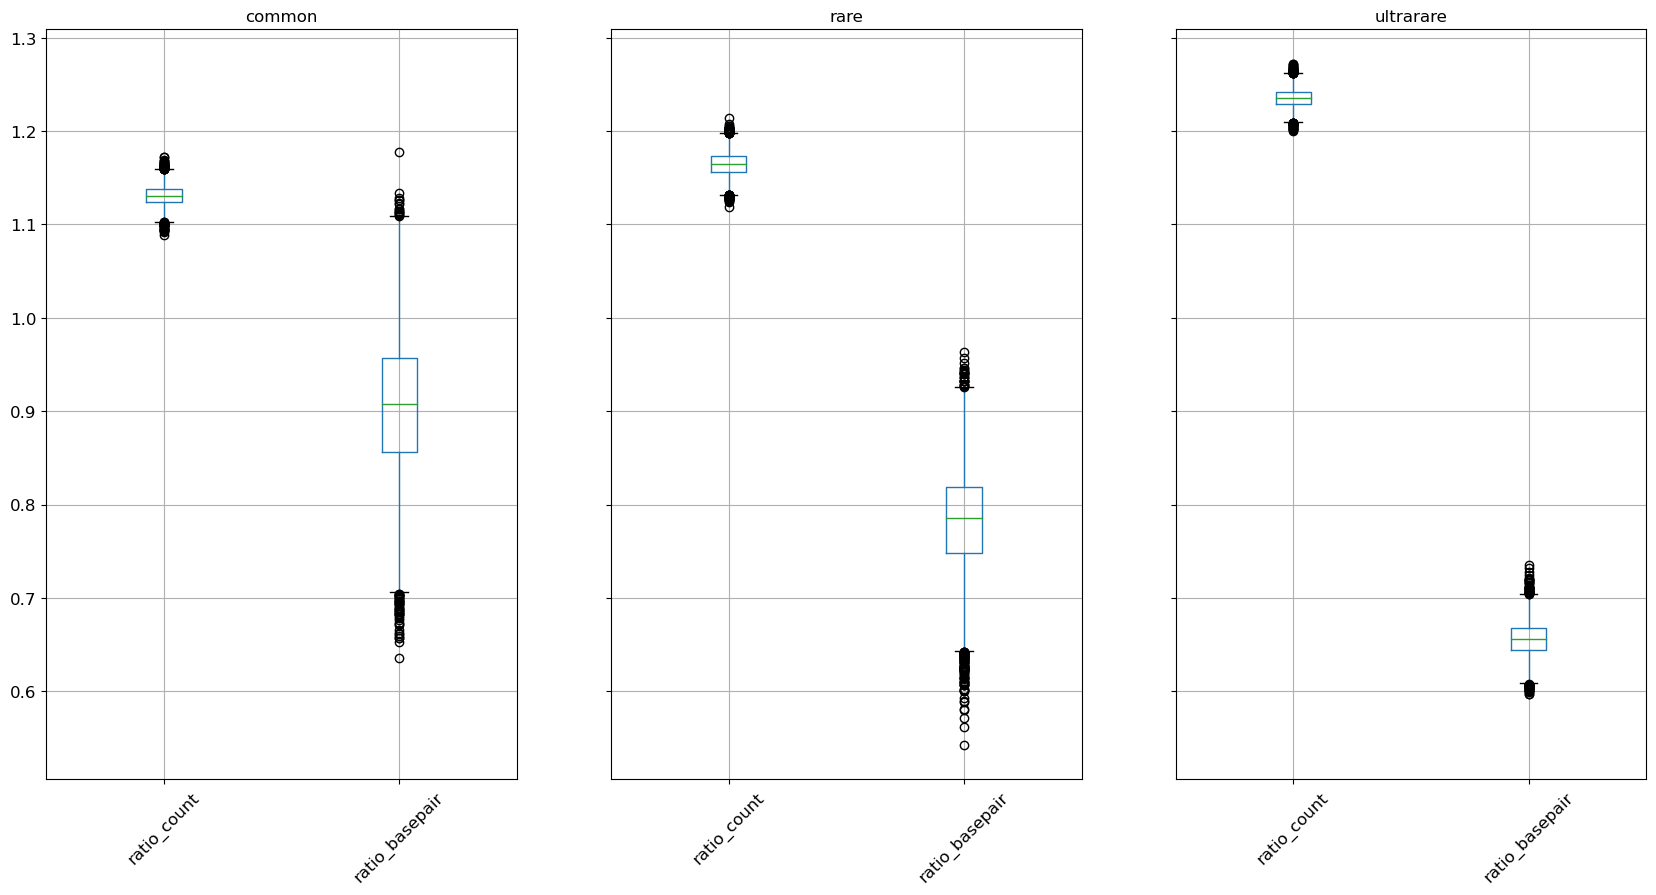

In [17]:
iter_df_TMP = iter_df.drop(['intron', 'intergenic','intron_bases','intergenic_bases'], axis=1)
grouped = iter_df_TMP.groupby(["afbin"])

ax = grouped.boxplot(rot=45, fontsize=12, figsize=(20,10), layout=(1,3)) 


In [10]:
grouped